/var/folders/p0/_9x9k0js55d0v7h2bltslszm0000gn/T/ipykernel_47457/588380971.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmar['month'] = timestamps.dt.month


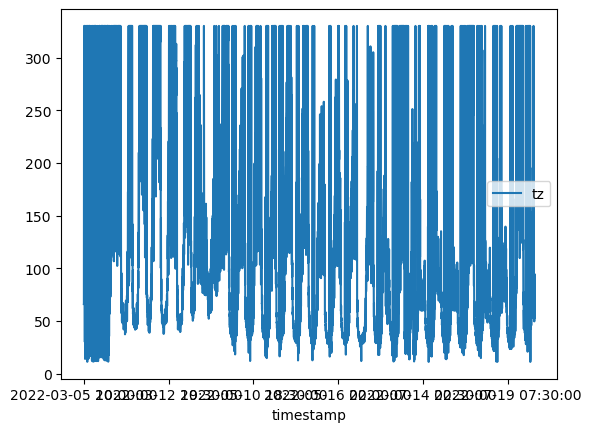

In [38]:
import sf2gs_app.dfg2db as dfg
import pandas as pd
TZ_TABLES=['CR6Irriwell1Router_tzs','CR6Irriwell2Meteo_tzs','CR6Irriwell3_tzs','CR6Irriwell4_tzs']
METEO_TABLE='CR6Irriwell2Meteo_Met30'
tz_table=TZ_TABLES[0]
tab=dfg.lee_tablas()
df_Js_VPD=dfg.db2df(tz_table+"_Jsvpd")
#print(tab)
start_date=['2022-03-01', '2022-05-09', '2022-07-11', '2022-03-02', '2022-03-02', '2022-03-02']
end_date=['2022-03-17', '2022-05-19', '2022-07-21', '2023-08-15', '2023-08-15', '2023-08-15']
timefilter=f"((timestamp>='{start_date[0]}') and (timestamp<='{end_date[0]}'))"
timefilter+=f" or ((timestamp>='{start_date[1]}') and (timestamp<='{end_date[1]}'))"
timefilter+=f" or ((timestamp>='{start_date[2]}') and (timestamp<='{end_date[2]}'))"
dfmar=df_Js_VPD.query(timefilter)
dfmar.plot('timestamp','tz')
dfmar.to_clipboard()
timestamps = pd.to_datetime(dfmar['timestamp'])
dfmar['month'] = timestamps.dt.month        

In [39]:
dfmar

,timestamp,arbol,sup,tz,vpd,par,Js,Js_VPD,month
0,2022-03-05 10:00:00,1,0,65.97,0.386,181.500,15.237099,39.474350,3
1,2022-03-05 10:00:00,1,1,66.76,0.386,181.500,14.992957,38.841857,3
2,2022-03-05 10:00:00,2,0,330.00,0.386,181.500,1.977228,5.122351,3
3,2022-03-05 10:00:00,2,1,330.00,0.386,181.500,1.977228,5.122351,3
4,2022-03-05 10:30:00,1,0,330.00,0.330,283.600,1.977228,5.991599,3
...,...,...,...,...,...,...,...,...,...
23519,2022-07-20 23:00:00,2,1,62.34,0.556,0.032,16.459461,29.603347,7
23520,2022-07-20 23:30:00,1,0,89.50,0.453,0.036,10.152822,22.412411,7
23521,2022-07-20 23:30:00,1,1,94.50,0.453,0.036,9.459236,20.881316,7
23522,2022-07-20 23:30:00,2,0,52.64,0.453,0.036,20.807217,45.932045,7


In [6]:
import pandas as pd
import plotly.express as px

df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 facet_col="species", title="Using update_traces() With Plotly Express Figures")

#fig.update_traces(
#    line=dict(dash="dot", width=4),
#    selector=dict(type="scatter", mode="lines"))
fig.update_layout(boxmode='overlay', width=800, height=500)
fig.update_traces(selector=dict(type='scatter'), mode='lines')
fig.show()

In [9]:
import plotly.express as px
import pandas as pd

# Ejemplo de datos de timestamp y valores
data = {
    'timestamp': [
        pd.Timestamp('2023-08-19 10:00:00'),
        pd.Timestamp('2023-08-19 10:15:00'),
        pd.Timestamp('2023-08-19 11:00:00'),
        pd.Timestamp('2023-08-19 11:45:00'),
        pd.Timestamp('2023-08-19 13:00:00')
    ],
    'value': [10, 15, 20, 25, 30]
}

df = pd.DataFrame(data)

# Calcula la diferencia entre los timestamps
df['time_diff'] = df['timestamp'].diff()

# Define una columna para indicar si hay un hueco de más de 30 minutos
df['gap'] = df['time_diff'] > pd.Timedelta(minutes=30)

# Crea el gráfico
fig = px.scatter(df, x='timestamp', y='value', 
                 title='Gráfico con Huecos de Datos',
                 color='gap',  # Usar la columna 'gap' para el color
                 labels={'timestamp': 'Timestamp', 'value': 'Valor'})
fig.update_layout(boxmode='overlay', width=800, height=500)
# Establece el estilo de trazado para los huecos
fig.update_traces(mode='lines', line=dict(dash='dot'), selector={'gap': True})

fig.show()

In [16]:
import plotly.graph_objects as go
import pandas as pd

# Ejemplo de datos de timestamp y valores
data = {
    'timestamp': [
        pd.Timestamp('2023-08-19 10:00:00'),
        pd.Timestamp('2023-08-19 10:15:00'),
        pd.Timestamp('2023-08-19 11:00:00'),
        pd.Timestamp('2023-08-19 11:45:00'),
        pd.Timestamp('2023-08-19 12:00:00')
    ],
    'value': [10, 15, 20, 25, 30]
}

df = pd.DataFrame(data)

# Ordena el DataFrame por timestamp
df = df.sort_values(by='timestamp')

# Calcula la diferencia entre los timestamps
df['time_diff'] = df['timestamp'].diff()

# Crea la figura
fig = go.Figure()

# Agrega las líneas en segmentos de tiempo continuo
x = []
y = []
for i, row in df.iterrows():
    x.append(row['timestamp'])
    y.append(row['value'])
    if row['time_diff'] > pd.Timedelta(minutes=30):
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))
        x = []
        y = []

# Agrega la última línea
if len(x) > 0:
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))

fig.update_layout(title='Gráfico con Huecos de Datos',
                  xaxis_title='Timestamp',
                  yaxis_title='Valor')
fig.update_layout(boxmode='overlay', width=800, height=500)
fig.show()
